# DH 140 Final Project W22

Spurthi Rallapalli, Cindy Zheng, Carol Cheng
3/11/22

## Requirements

Jupyter Notebook:
- [ ] Importing, cleaning, organizing, merging, and processing the data using pandas and/or other python libraries
- [ ] Basic statistical analysis that includes at least a set of descriptive statistics and informative plots of the data (such as scatter plots, histograms, bar plots, box plots, etc)
- [ ] You must utilize at least one Python library outside Pandas that we have covered in our study of data visualization, mapping, web scraping, APIs, text analysis, statistics, basic machine learning, and network analysis
- [ ] Tell the story of your analysis in 1500+ words (not including tables, figures, captions, or references).
- [x] Be organized into four sections. (Introduction, Methods, Results, Discussion)
- [ ] The top of your notebook must include your name(s), the date, and your project title.
- [ ] If you are working in a group, the end must describe each group member's contribution to this final project (one sentence each).

Jupyter notebook for your blog site
- [ ] Present your analysis and narrative without the fluff
- [ ] The notebook/blog should be very similar to your project notebook with the exception that it should hide trivial code (such as exploratory analysis and plotting) and remove narrative unnecessary to addressing your primary question.
- [ ] Nontrivial code (including library imports, data preparation steps, and key data analysis/plotting code) should still be included.

## Research Topic Introduction

**Research Question:** Our research question is "How does a song's popularity spread over time depending on the origin country of the artist, and how much of that is attributed to the lyrics / word patterns in that song?"

For this analysis, we specifically picked two artists from the United States and the UK, analyzed the popularity of their songs, and did a lyrical analysis. 

**Why it is important to you, why it matters to others, and what is at stake:** Music is something that everyone connects to, and our group wants to find a way to measure how and why music is spread across the world. It’s a way for musicians to figure out which kind of music allows them to connect with different audiences and cross cultural and linguistic barriers. It’s also a way for us as listeners to help determine what connects us to certain kinds of music, what word frequencies and thematic patterns matter most to us, and what cultural practices and norms cause certain groups to listen (or not to listen) to certain types of music. Essentially, it’s a way to determine what connects us all!

**Description of data sources used:**
The first data source is from Spotify Charts. Spotify Charts is a website from the popular music streaming app, Spotify. Spofity constantly keeps ranking of how often songs are streamed from their uses, and keeps track of which songs are streamed the most. Spotify also separates these streaming counts by country. The top 200 songs of each day or week and their total streams are available to download in csv format from Spotify Charts. The data can be found at https://spotifycharts.com/. 

The second data source will be song lyrics. These can be found on genius.com, and we will be copying and pasting the text lyrics from those websites to perform text analysis. https://genius.com/

## Methods

Below is the code that we used to import the data into our Jupyter Notebook. We went to Spotify Charts to look at Top 200 Hits Data for every week in 2021 in the United States and the UK:   

In [2]:
import pandas as pd
import os
import glob
import requests
from bs4 import BeautifulSoup as bs
import datetime
import time
#import cloudscraper

def readData(country):
    path = os.getcwd()
    path = os.path.join(path, "Data", country, "*.csv")
    csv_files = glob.glob(path)
    # loop over the list of csv files
    weekly_charts = pd.DataFrame()

    for f in csv_files:

        filename = os.path.basename(f)
        # read the csv file
        df = pd.read_csv(f)

        idx = filename.index('weekly')
        date_time_obj = datetime.datetime.strptime(filename[idx+7:-4], '%Y-%m-%d')

        df["date"] = date_time_obj

        weekly_charts= weekly_charts.append(df)
    return weekly_charts

weekly_us_charts = readData("us")
weekly_gb_charts = readData("gb")
#weekly_global_charts = readData("GlobalData")


In the code above, we created a function readData that allowed us to create 2 different datasets, one for the US and one for the UK. Let's start by doing a preliminary analysis of the data. 

In [3]:
weekly_us_charts.head()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,1,spotify:track:5Z9KJZvQzH6PFmb8SNkxuk,"Lil Nas X, Jack Harlow",INDUSTRY BABY (feat. Jack Harlow),Columbia,1,1,12,9688481,2021-10-14
1,2,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),Columbia,1,2,14,8460919,2021-10-14
2,3,spotify:track:2BcMwX1MPV6ZHP4tUT9uq6,"Drake, 21 Savage, Project Pat",Knife Talk (with 21 Savage ft. Project Pat),OVO,2,3,6,7662116,2021-10-14
3,4,spotify:track:0k1WUmIRnG3xU6fvvDVfRG,"Drake, Future, Young Thug",Way 2 Sexy (with Future & Young Thug),OVO,1,4,6,7071703,2021-10-14
4,5,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,Polydor Records,5,5,46,6799327,2021-10-14


In [4]:
weekly_gb_charts.head()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,1,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,Olivia Rodrigo,drivers license,Olivia Rodrigo PS,1,1,3,5134081,2021-01-28
1,2,spotify:track:27OeeYzk6klgBh83TSvGMA,The Kid LAROI,WITHOUT YOU,Columbia,2,3,12,1777331,2021-01-28
2,3,spotify:track:4I5bvu2KDsrCg0EWHIcvul,"Anne-Marie, KSI, Digital Farm Animals",Don't Play,Asylum Records,2,2,2,1721569,2021-01-28
3,4,spotify:track:3YJJjQPAbDT7mGpX3WtQ9A,SZA,Good Days,Top Dawg Entertainment/RCA Records,4,5,5,1484337,2021-01-28
4,5,spotify:track:5vGLcdRuSbUhD8ScwsGSdA,CJ,Whoopty,CJ Music Group/T-Series,3,4,15,1438281,2021-01-28


As seen above, a quick look into the data shows that there are a couple of fields that our data encompasses that are common among the two datasets: 
- rank
- uri
- arist name(s)
- track name
- source
- peak rank
- previous rank
- weeks on chart
- streams
- date

I also want to get a sense of which dates we are looking at across the two countries, so I'm going to do a quick analysis of the date field to see which dates are included.

In [5]:
weekly_us_charts['date'].unique()

array(['2021-10-14T00:00:00.000000000', '2021-08-19T00:00:00.000000000',
       '2021-06-03T00:00:00.000000000', '2021-11-18T00:00:00.000000000',
       '2021-01-07T00:00:00.000000000', '2021-05-13T00:00:00.000000000',
       '2021-01-14T00:00:00.000000000', '2021-06-10T00:00:00.000000000',
       '2021-08-12T00:00:00.000000000', '2021-07-15T00:00:00.000000000',
       '2021-09-30T00:00:00.000000000', '2021-12-23T00:00:00.000000000',
       '2021-03-18T00:00:00.000000000', '2021-03-25T00:00:00.000000000',
       '2021-09-16T00:00:00.000000000', '2021-04-01T00:00:00.000000000',
       '2021-03-04T00:00:00.000000000', '2021-11-25T00:00:00.000000000',
       '2021-12-02T00:00:00.000000000', '2021-07-22T00:00:00.000000000',
       '2021-06-17T00:00:00.000000000', '2021-04-29T00:00:00.000000000',
       '2021-07-01T00:00:00.000000000', '2021-06-24T00:00:00.000000000',
       '2021-05-27T00:00:00.000000000', '2021-05-20T00:00:00.000000000',
       '2021-10-28T00:00:00.000000000', '2021-05-06

In [6]:
len(weekly_us_charts['date'].unique())

52

In [7]:
weekly_gb_charts['date'].unique()

array(['2021-01-28T00:00:00.000000000', '2021-11-25T00:00:00.000000000',
       '2021-12-23T00:00:00.000000000', '2021-06-17T00:00:00.000000000',
       '2021-08-05T00:00:00.000000000', '2021-07-15T00:00:00.000000000',
       '2021-04-22T00:00:00.000000000', '2021-09-30T00:00:00.000000000',
       '2021-03-04T00:00:00.000000000', '2021-04-29T00:00:00.000000000',
       '2021-06-03T00:00:00.000000000', '2021-04-15T00:00:00.000000000',
       '2021-06-24T00:00:00.000000000', '2021-10-07T00:00:00.000000000',
       '2021-12-02T00:00:00.000000000', '2021-09-16T00:00:00.000000000',
       '2021-08-19T00:00:00.000000000', '2021-02-25T00:00:00.000000000',
       '2021-05-20T00:00:00.000000000', '2021-09-23T00:00:00.000000000',
       '2021-07-22T00:00:00.000000000', '2021-07-29T00:00:00.000000000',
       '2021-05-06T00:00:00.000000000', '2021-07-01T00:00:00.000000000',
       '2021-04-01T00:00:00.000000000', '2021-01-21T00:00:00.000000000',
       '2021-01-14T00:00:00.000000000', '2021-11-11

In [8]:
len(weekly_gb_charts['date'].unique())

52

For this analysis, we want to make sure that the two datasets cover the same dates, so we'll do a check right now to see if the dates are the same. 

In [9]:
for day in weekly_us_charts['date'].unique(): 
    if day not in weekly_gb_charts['date'].unique():
        print(day)

In [10]:
for day in weekly_gb_charts['date'].unique(): 
    if day not in weekly_us_charts['date'].unique():
        print(day)

This means that all the dates are the same in both of the datasets!

The other thing we also noticed is that the dates are not in order, so we will try to reorder them. [This link](https://stackoverflow.com/questions/17141558/how-to-sort-a-dataframe-in-python-pandas-by-two-or-more-columns) helped with that.



In [11]:
weekly_us_charts = weekly_us_charts.sort_values(by=['date','rank'], ascending = [True, True])


In [12]:
weekly_gb_charts = weekly_gb_charts.sort_values(by=['date','rank'], ascending = [True, True])


If we take a look at the first and last few values of each chart, we can see that they have been put in the right order by date and kept the ranking the same. 

In [13]:
weekly_us_charts.head(10)

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,1,spotify:track:3YJJjQPAbDT7mGpX3WtQ9A,SZA,Good Days,Top Dawg Entertainment/RCA Records,1,10,2,6323585,2021-01-07
1,2,spotify:track:31qCy5ZaophVA81wtlwLc4,Justin Bieber,Anyone,RBMG/Def Jam,2,-1,1,6149984,2021-01-07
2,3,spotify:track:6Im9k8u9iIzKMrmV7BWtlF,Ariana Grande,34+35,Republic Records,2,2,10,5606876,2021-01-07
3,4,spotify:track:3tjFYV6RSFtuktYl3ZtYcq,"24kGoldn, iann dior",Mood (feat. iann dior),Records/Columbia,2,4,22,5583614,2021-01-07
4,5,spotify:track:7hxHWCCAIIxFLCzvDgnQHX,"Internet Money, Gunna, Don Toliver, NAV","Lemonade (feat. Gunna, Don Toliver & NAV)",Internet Money Records/ TenThousand Projects,1,5,21,5368252,2021-01-07
5,6,spotify:track:4MzXwWMhyBbmu6hOcLVD49,"Bad Bunny, Jhay Cortez",DÁKITI,Rimas Entertainment LLC,1,6,10,5161927,2021-01-07
6,7,spotify:track:35mvY5S1H3J2QZyna3TFe0,Ariana Grande,positions,Republic Records,1,9,11,5102841,2021-01-07
7,8,spotify:track:5vGLcdRuSbUhD8ScwsGSdA,CJ,Whoopty,CJ Music Group/T-Series,8,13,11,4877062,2021-01-07
8,9,spotify:track:27OeeYzk6klgBh83TSvGMA,The Kid LAROI,WITHOUT YOU,Columbia,9,11,8,4777818,2021-01-07
9,10,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,Blinding Lights,Republic Records,1,19,58,4440447,2021-01-07


In [14]:
weekly_us_charts.tail(10)

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
190,191,spotify:track:370oYn3s5EKu7ziUpMQQTr,Amy Grant,White Christmas,Amy Grant Label (AGG),65,127,11,1561617,2021-12-30
191,192,spotify:track:6tDDoYIxWvMLTdKpjFkc1B,Kali Uchis,telepatía,EMI / Interscope,4,192,46,1553987,2021-12-30
192,193,spotify:track:2ZXxRC6V6AXzMdbLQZMHSB,Lil Tecca,LOT OF ME,Galactic / Republic Records,65,-1,13,1553543,2021-12-30
193,194,spotify:track:30QR0ndUdiiMQMA9g1PGCm,$uicideboy$,"...And to Those I Love, Thanks for Sticking Ar...",G59 Records,37,-1,39,1551895,2021-12-30
194,195,spotify:track:2KnLkZ3z7PO3kgVGHGqDpD,Shawn Mendes,It'll Be Okay,Shawn Mendes LP4-5 PS/ Island,100,-1,2,1551299,2021-12-30
195,196,spotify:track:4jPy3l0RUwlUI9T5XHBW2m,"24kGoldn, iann dior",Mood (feat. iann dior),Records/Columbia,2,-1,72,1544286,2021-12-30
196,197,spotify:track:2LBqCSwhJGcFQeTHMVGwy3,The Weeknd,Die For You,Universal Republic Records,74,-1,42,1536551,2021-12-30
197,198,spotify:track:7kDUspsoYfLkWnZR7qwHZl,"Machine Gun Kelly, blackbear",my ex's best friend (with blackbear),Bad Boy/Interscope Records,11,195,73,1528614,2021-12-30
198,199,spotify:track:3J8EOeKLTLXORtWPpOU5bE,"Lil Tjay, 6LACK",Calling My Phone,Columbia,1,-1,41,1521613,2021-12-30
199,200,spotify:track:0uRrG2jRR5tuifsYIJHEao,Morgan Wallen,Sand In My Boots,Big Loud / Republic,13,-1,27,1518916,2021-12-30


I also wanted to do some summary statistics for each day.

In [15]:
days = weekly_us_charts['date'].unique()

In [16]:
for i in days:
    avg_week_on_charts = 0
    max_week_on_charts = 0
    subset = weekly_us_charts.loc[weekly_us_charts['date'] == i]
    avg_week_on_charts = subset['weeks_on_chart'].mean()
    max_week_on_charts = subset['weeks_on_chart'].max()
    avg_streams = subset['streams'].mean()
    peak_ranking = subset['peak_rank'].mode()
    ts = pd.to_datetime(str(i)) 
    d = ts.strftime('%Y-%m-%d')
    print("Country: United States")
    print("Date: ", d)
    print("Average number of weeks this week’s top 200 have been on the chart: ", avg_week_on_charts)
    print("Maximum number of weeks this week’s top 200 have been on the chart: ", max_week_on_charts)
    print("Average number of steams of weeks this week’s top 200: ", avg_streams)
    print("Most common peak ranking of weeks this week’s top 200: ", peak_ranking[0])
    print("")

Country: United States
Date:  2021-01-07
Average number of weeks this week’s top 200 have been on the chart:  38.125
Maximum number of weeks this week’s top 200 have been on the chart:  210
Average number of steams of weeks this week’s top 200:  2209871.275
Most common peak ranking of weeks this week’s top 200:  1

Country: United States
Date:  2021-01-14
Average number of weeks this week’s top 200 have been on the chart:  32.755
Maximum number of weeks this week’s top 200 have been on the chart:  211
Average number of steams of weeks this week’s top 200:  2657771.18
Most common peak ranking of weeks this week’s top 200:  1

Country: United States
Date:  2021-01-21
Average number of weeks this week’s top 200 have been on the chart:  33.89
Maximum number of weeks this week’s top 200 have been on the chart:  212
Average number of steams of weeks this week’s top 200:  2521075.2
Most common peak ranking of weeks this week’s top 200:  1

Country: United States
Date:  2021-01-28
Average numb

For the data above, I used [this link](https://stackoverflow.com/questions/19502506/convert-numpy-datetime64-to-string-object-in-python) to make the date more readable.

Now, we did the same for the United Kingdom data.

In [17]:
# the days are the same so I won't redeclare them

for i in days:
    avg_week_on_charts = 0
    max_week_on_charts = 0
    subset = weekly_gb_charts.loc[weekly_gb_charts['date'] == i]
    avg_week_on_charts = subset['weeks_on_chart'].mean()
    max_week_on_charts = subset['weeks_on_chart'].max()
    avg_streams = subset['streams'].mean()
    peak_ranking = subset['peak_rank'].mode()
    ts = pd.to_datetime(str(i)) 
    d = ts.strftime('%Y-%m-%d')
    print("Country: United Kingdom")
    print("Date: ", d)
    print("Average number of weeks this week’s top 200 have been on the chart: ", avg_week_on_charts)
    print("Maximum number of weeks this week’s top 200 have been on the chart: ", max_week_on_charts)
    print("Average number of steams of weeks this week’s top 200: ", avg_streams)
    print("Most common peak ranking of weeks this week’s top 200: ", peak_ranking[0])
    print("")

Country: United Kingdom
Date:  2021-01-07
Average number of weeks this week’s top 200 have been on the chart:  43.0
Maximum number of weeks this week’s top 200 have been on the chart:  211
Average number of steams of weeks this week’s top 200:  520903.335
Most common peak ranking of weeks this week’s top 200:  1

Country: United Kingdom
Date:  2021-01-14
Average number of weeks this week’s top 200 have been on the chart:  39.57
Maximum number of weeks this week’s top 200 have been on the chart:  212
Average number of steams of weeks this week’s top 200:  584180.265
Most common peak ranking of weeks this week’s top 200:  1

Country: United Kingdom
Date:  2021-01-21
Average number of weeks this week’s top 200 have been on the chart:  40.41
Maximum number of weeks this week’s top 200 have been on the chart:  213
Average number of steams of weeks this week’s top 200:  604862.895
Most common peak ranking of weeks this week’s top 200:  1

Country: United Kingdom
Date:  2021-01-28
Average num

Then we looked at the streams for the number 1 song each week and plotted it for both the US and the UK, just to see what the trends looked like. 

In [18]:
number1us = weekly_us_charts.loc[weekly_us_charts['rank'] == 1]

In [19]:
number1uk = weekly_gb_charts.loc[weekly_gb_charts['rank'] == 1]

<AxesSubplot:xlabel='date'>

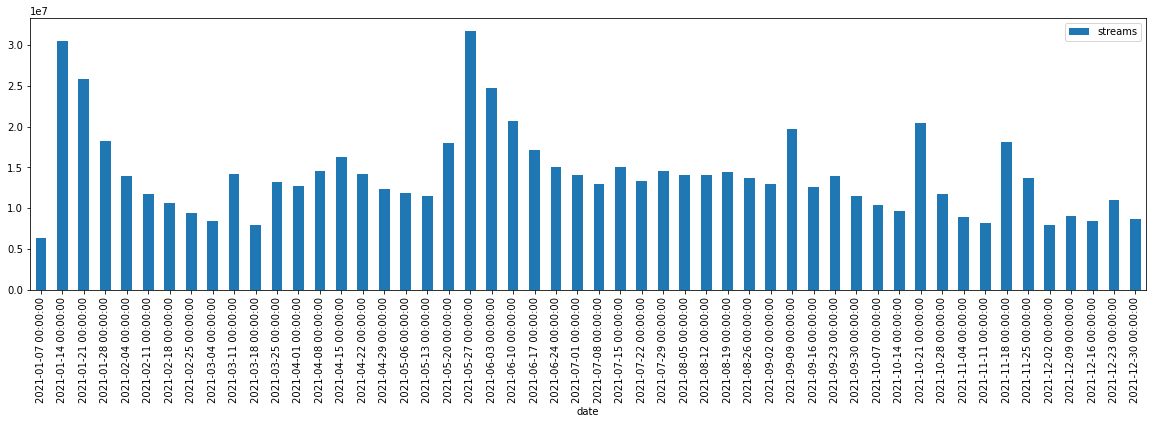

In [20]:
number1us.plot(kind='bar', x='date', y='streams', figsize=(20,5))

<AxesSubplot:xlabel='date'>

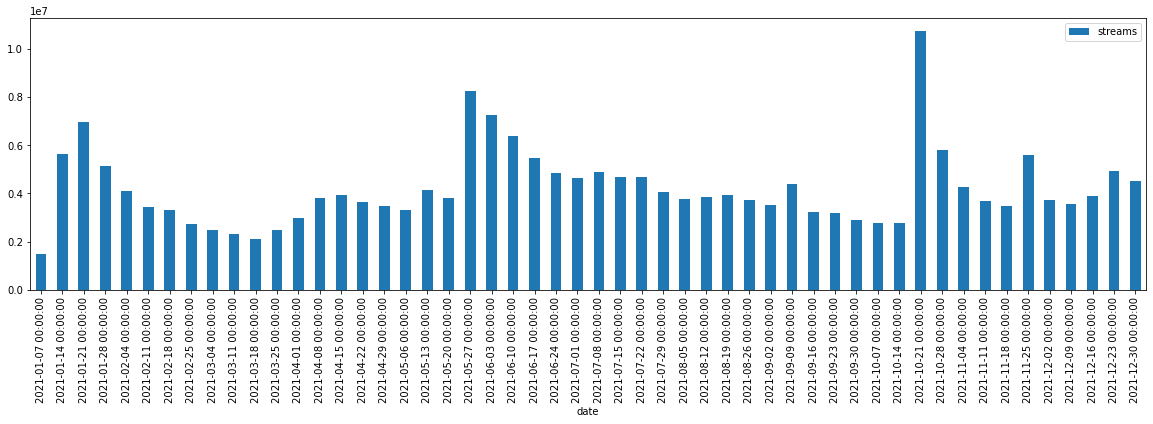

In [21]:
number1uk.plot(kind='bar', x='date', y='streams', figsize=(20,5))

We also wanted to plot the current rank compared with the previous rank for one week. We picked the day at random (2021-11-18) and plotted it for both the US and UK.

In [25]:
peakprevUS = weekly_us_charts.loc[weekly_us_charts['date'] == "2021-11-18T00:00:00.000000000"]
peakprevUS.head()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,1,spotify:track:5enxwA8aAbwZbf5qCHORXi,Taylor Swift,All Too Well (10 Minute Version) (Taylor's Ver...,Taylor Swift,1,-1,1,18105602,2021-11-18
1,2,spotify:track:7sMBvZCSUl99bJLXZaLa0b,"Bruno Mars, Anderson .Paak, Silk Sonic",Smokin Out The Window,Aftermath Entertainment/Atlantic,2,5,2,10067882,2021-11-18
2,3,spotify:track:4OAuvHryIVv4kMDNSLuPt6,Taylor Swift,Red (Taylor's Version),Taylor Swift,3,-1,1,8676447,2021-11-18
3,4,spotify:track:3nsfB1vus2qaloUdcBZvDu,Taylor Swift,All Too Well (Taylor's Version),Taylor Swift,4,-1,1,8403008,2021-11-18
4,5,spotify:track:01K4zKU104LyJ8gMb7227B,"Taylor Swift, Phoebe Bridgers",Nothing New (feat. Phoebe Bridgers) (Taylor’s ...,Taylor Swift,5,-1,1,7818397,2021-11-18


We want to filter out the ones that have -1 as a ranking, which means they probably weren't on the ranking before, and then plot it.

<AxesSubplot:xlabel='rank', ylabel='previous_rank'>

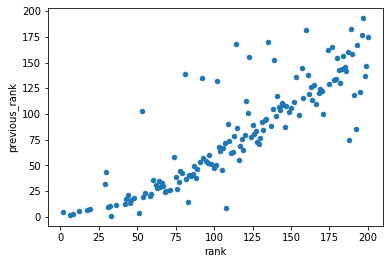

In [26]:
peakprevfiltUS = peakprev.loc[peakprev['previous_rank'] != -1]
peakprevfiltUS.plot(kind='scatter', x='rank', y='previous_rank')

In [27]:
peakprevUK = weekly_gb_charts.loc[weekly_gb_charts['date'] == "2021-11-18T00:00:00.000000000"]
peakprevUK.head()

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
0,1,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,Adele,Easy On Me,Columbia,1,1,5,3458623,2021-11-18
1,2,spotify:track:5enxwA8aAbwZbf5qCHORXi,Taylor Swift,All Too Well (10 Minute Version) (Taylor's Ver...,Taylor Swift,2,-1,1,2787198,2021-11-18
2,3,spotify:track:50nfwKoDiSYg8zOCREWAm5,Ed Sheeran,Shivers,Atlantic Records UK,1,2,10,2616693,2021-11-18
3,4,spotify:track:7rglLriMNBPAyuJOMGwi39,"Elton John, Dua Lipa, PNAU",Cold Heart - PNAU Remix,EMI,2,4,14,2237196,2021-11-18
4,5,spotify:track:2BzAGK3lEZAQz5cU0Ae1wd,ArrDee,Flowers (Say My Name),Universal-Island Records Ltd.,5,5,2,2139786,2021-11-18


<AxesSubplot:xlabel='rank', ylabel='previous_rank'>

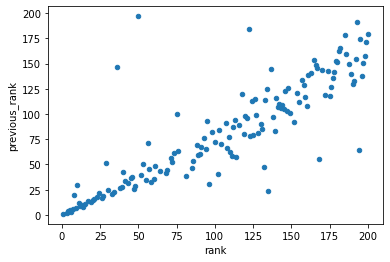

In [29]:
peakprevfiltUK = peakprevUK.loc[peakprevUK['previous_rank'] != -1]
peakprevfiltUK.plot(kind='scatter', x='rank', y='previous_rank')

After this preliminary research, we determined that we wanted to look at 2 artists for our research question: Adele, who is from the UK, and Lil Nas X, who is from the US. So we did a little bit more exploratory analysis into these two artists. 

In [34]:
# Go through US charts and find all the rows with Lil Nas X
lilnasxUS = weekly_us_charts.loc[weekly_us_charts['artist_names'] == "Lil Nas X"]
print(len(lilnasxUS))
lilnasxUS.head()

88


,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
18,19,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,14,16,8,3804112,2021-01-07
32,33,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,14,19,9,3590559,2021-01-14
31,32,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,14,33,10,3304136,2021-01-21
41,42,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,14,32,11,2890140,2021-01-28
47,48,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,14,42,12,2670692,2021-02-04


In [35]:
# Go through UK charts and find all the rows with Lil Nas X
lilnasxUK = weekly_gb_charts.loc[weekly_gb_charts['artist_names'] == "Lil Nas X"]
print(len(lilnasxUK))
lilnasxUK.head()

78


,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
18,19,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,19,47,8,870167,2021-01-07
23,24,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,19,19,9,853586,2021-01-14
33,34,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,19,24,10,775141,2021-01-21
47,48,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,19,34,11,691652,2021-01-28
58,59,spotify:track:6zFMeegAMYQo0mt8rXtrli,Lil Nas X,HOLIDAY,Columbia,19,48,12,602965,2021-02-04


In [42]:
# Go through US charts and find all the rows with Adele
adeleUS = weekly_us_charts.loc[weekly_us_charts['artist_names'] == "Adele"]
print(len(adeleUS))
adeleUS.head()

73


,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
167,168,spotify:track:6O5TrlFWTYvznd9fMC0VvU,Adele,When We Were Young,XL Recordings,168,-1,1,1500336,2021-10-14
0,1,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,Adele,Easy On Me,Columbia,1,-1,1,20462767,2021-10-21
34,35,spotify:track:6O5TrlFWTYvznd9fMC0VvU,Adele,When We Were Young,XL Recordings,35,168,2,3150036,2021-10-21
44,45,spotify:track:5lkpeJwmQKgY3bX2zChjxX,Adele,Someone Like You,XL Recordings,45,-1,1,2769224,2021-10-21
53,54,spotify:track:6IAZHEBUIGJ6NJKxxOBIEr,Adele,Rolling in the Deep,XL Recordings,54,-1,1,2506748,2021-10-21


In [44]:
# Go through UK charts and find all the rows with Adele
adeleUK = weekly_gb_charts.loc[weekly_gb_charts['artist_names'] == "Adele"]
print(len(adeleUK))
adeleUK.head()

168


,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,date
173,174,spotify:track:5lkpeJwmQKgY3bX2zChjxX,Adele,Someone Like You,XL Recordings,172,-1,9,338653,2021-01-14
186,187,spotify:track:5lkpeJwmQKgY3bX2zChjxX,Adele,Someone Like You,XL Recordings,172,174,10,333786,2021-01-21
176,177,spotify:track:5lkpeJwmQKgY3bX2zChjxX,Adele,Someone Like You,XL Recordings,172,187,11,341364,2021-01-28
185,186,spotify:track:5lkpeJwmQKgY3bX2zChjxX,Adele,Someone Like You,XL Recordings,172,177,12,342555,2021-02-04
177,178,spotify:track:5lkpeJwmQKgY3bX2zChjxX,Adele,Someone Like You,XL Recordings,172,186,13,340240,2021-02-11


Interestingly already, we see a bit of a difference! In the year 2021, Lil Nas X (US) was on the weekly Top 200 charts in the US 88 times, while he was on the weekly Top 200 charts in UK for a fewer number of times 78. For Adele, she was on the US charts 73 times but on the UK ones 168 times. 

For both of these artists, we also wanted to look at the songs that appeared on the charts.

In [46]:
lilnasxUS['track_name'].unique()

array(['HOLIDAY', 'MONTERO (Call Me By Your Name)', 'SUN GOES DOWN',
       'THATS WHAT I WANT', 'DEAD RIGHT NOW', 'TALES OF DOMINICA',
       'LOST IN THE CITADEL', 'DONT WANT IT', 'VOID', 'LIFE AFTER SALEM'],
      dtype=object)

In [47]:
lilnasxUK['track_name'].unique()

array(['HOLIDAY', 'MONTERO (Call Me By Your Name)', 'SUN GOES DOWN',
       'THATS WHAT I WANT', 'DEAD RIGHT NOW', 'TALES OF DOMINICA',
       'LOST IN THE CITADEL', 'DONT WANT IT', 'VOID'], dtype=object)

In [50]:
adeleUS['track_name'].unique()

array(['When We Were Young', 'Easy On Me', 'Someone Like You',
       'Rolling in the Deep', 'Love In The Dark', 'Set Fire to the Rain',
       'All I Ask', 'Chasing Pavements',
       'Send My Love (To Your New Lover)', 'Make You Feel My Love',
       'Hello', 'Oh My God', 'Can I Get It', 'My Little Love',
       'I Drink Wine', 'Strangers By Nature', 'Cry Your Heart Out',
       'To Be Loved', 'All Night Parking (with Erroll Garner) Interlude',
       'Woman Like Me', 'Hold On', 'Love Is A Game'], dtype=object)

In [51]:
adeleUK['track_name'].unique()

array(['Someone Like You', 'Make You Feel My Love', 'Rolling in the Deep',
       'When We Were Young', 'Love In The Dark', 'Chasing Pavements',
       'Set Fire to the Rain', 'Send My Love (To Your New Lover)',
       'Rumour Has It', 'All I Ask', 'Skyfall', 'Hello', 'Easy On Me',
       'Turning Tables', 'Water Under the Bridge', 'Hometown Glory',
       'Remedy', 'Oh My God', 'I Drink Wine', 'My Little Love',
       'Can I Get It', 'Strangers By Nature', 'Cry Your Heart Out',
       'To Be Loved', 'Hold On',
       'All Night Parking (with Erroll Garner) Interlude',
       'Woman Like Me', 'Love Is A Game'], dtype=object)

In [52]:
# Find songs in one list that aren't on the other
lilnasxUKsongs = lilnasxUK['track_name'].unique()
lilnasxUSsongs = lilnasxUS['track_name'].unique()

for song in lilnasxUSsongs:
    if song not in lilnasxUKsongs:
        print("The song " + song + " is in the US charts but not the UK charts")
        
for songs in lilnasxUKsongs:
    if songs not in lilnasxUSsongs:
        print("The song " + songs + " is in the UK charts but not the US charts")

The song LIFE AFTER SALEM is in the US charts but not the UK charts


In [55]:
# Find songs in one list that aren't on the other
adeleUKsongs = adeleUK['track_name'].unique()
adeleUSsongs = adeleUS['track_name'].unique()

for song in adeleUSsongs:
    if song not in adeleUKsongs:
        print("The song " + song + " is in the US charts but not the UK charts")
        
for songs in adeleUKsongs:
    if songs not in adeleUSsongs:
        print("The song " + songs + " is in the UK charts but not the US charts")

The song Rumour Has It is in the UK charts but not the US charts
The song Skyfall is in the UK charts but not the US charts
The song Turning Tables is in the UK charts but not the US charts
The song Water Under the Bridge is in the UK charts but not the US charts
The song Hometown Glory is in the UK charts but not the US charts
The song Remedy is in the UK charts but not the US charts


## Results

## Discussion